In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
df = pd.read_csv('../input/telecom_churn_data.csv')
df.head()

In [ ]:
print(df.circle_id.value_counts())
df.drop('circle_id', axis =1, inplace = True)

In [ ]:
#Saving in a series for Feature extraction
numbers = df.mobile_number
df.drop('mobile_number', axis = 1 , inplace=True)

In [ ]:
df.drop(df.loc[df.isnull().sum(axis=1)>150].index, axis = 0, inplace = True)

In [ ]:
df.reset_index(inplace=True)
df.info()

In [ ]:
df.isnull().sum()

## Assigning Labels

In [ ]:
df['Churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0 ) & (df['vol_3g_mb_9']==0),1,0)

In [ ]:
df[(df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0 ) & (df['vol_3g_mb_9']==0)][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','Churn']].head()

## Dropping the columns with prefix as _9

In [ ]:
col_9 = [i for i in df.columns if i.endswith('_9')]
col_9

In [ ]:
df = df.drop(col_9, axis =1)

In [ ]:

df.info()

## Cols needed to calculate the HVC's

In [ ]:
df[['av_rech_amt_data_7','total_rech_num_7', 'total_rech_amt_7','total_rech_data_7']].info()

In [ ]:

col_7 = ['av_rech_amt_data_7','total_rech_num_7', 'total_rech_amt_7','total_rech_data_7']
df[col_7].head()

In [ ]:
col_6 = ['av_rech_amt_data_6','total_rech_num_6', 'total_rech_amt_6','total_rech_data_6']
df[col_6].head()

In [ ]:
print(df[col_7].info())
print(df[col_6].info())

In [ ]:
df[col_7]=df[col_7].fillna(0)
df[col_6]=df[col_6].fillna(0)

In [ ]:
print(df[col_7].info())
print(df[col_6].info())

In [ ]:
df['total_amount_7']=df['total_rech_data_7']+(df['total_rech_data_7']*df['av_rech_amt_data_7'])
df['total_amount_6']=df['total_rech_data_6']+(df['total_rech_data_6']*df['av_rech_amt_data_6'])

In [ ]:
df['avg_amt_7_6']=(df['total_amount_7']+df['total_amount_6'])/2.0

In [ ]:
perc_70 = (df['avg_amt_7_6'].quantile(0.7))

In [ ]:
df=df[df['avg_amt_7_6']>=perc_70]
df.info()

In [ ]:
high_null = df.columns[df.isnull().sum()>=9000]
high_null

In [ ]:
df[high_null]=df[high_null].fillna(0)

In [ ]:
high_null= df.columns[df.isnull().sum()>=5000]
df[high_null]=df[high_null].fillna(0)

In [ ]:
col = df.columns[df.isnull().sum()>1500]
df[col] = df[col].fillna(0)

In [ ]:
sum(df.isnull().sum(axis = 1)>50)

In [ ]:
df.info()

In [ ]:

df.reset_index(inplace = True,drop = True)
df.head()
df.drop('index', inplace = True, axis =1)

In [ ]:
df.info()


In [ ]:
df[df.isnull().sum(axis =1)>60].head()

# Filling all NA's with Zero for Now

In [ ]:
df.fillna(0, inplace=True)
df.head()

In [ ]:
df.info()

In [ ]:
sum(df.isnull().sum()>0)

# Preparing Data for Modeling purpose

In [ ]:
obj_col = df.select_dtypes(include = 'object').columns
obj_col

In [ ]:
df.drop(obj_col,axis = 1 ,inplace = True)
df.head()

In [ ]:
X=df.drop('Churn', axis =1)
y=df.Churn
y.value_counts()

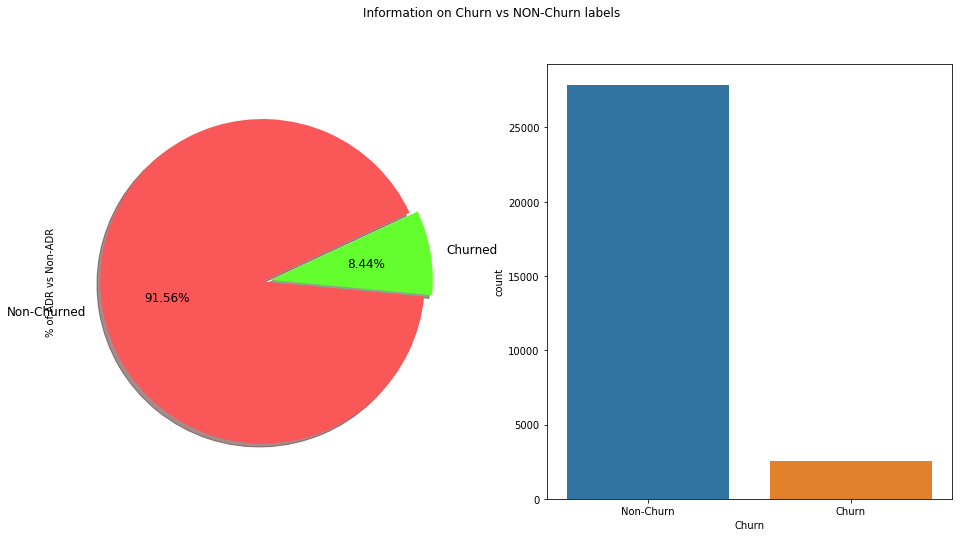

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(1,2,figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels = 'Non-Churned','Churned'
plt.suptitle('Information on Churn vs NON-Churn labels')
y.value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax =ax[0], shadow = True,
                                    colors = colors, labels = labels, fontsize =12, startangle=25)
ax[0].set_ylabel('% of ADR vs Non-ADR')

palette = ["#64FE2E", "#FA5858"]
sns.countplot(x='Churn', data=df)
ax[1].set_xticklabels(['Non-Churn','Churn'],rotation=0, rotation_mode="anchor")
plt.show()

In [ ]:
df.head()

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 42)

In [ ]:
X_train.head()

# PCA

In [ ]:
X_train.shape

In [ ]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
#Doing the PCA on the train data
pca.fit(X_train)

In [ ]:
len(pca.components_)

In [ ]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

#### Looking at the screeplot to assess the number of needed principal components

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(x=20)
plt.axhline(y=0.955)
plt.show()

#### Looks like 20 components are enough to describe 95% of the variance in the dataset
> - We'll choose 16 components for our modeling

In [ ]:
#Using incremental PCA for efficiency - as it saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [ ]:
pca_train = pca_final.fit_transform(X_train)
pca_train.shape

In [ ]:
#Applying selected components to the test data - 16 components
pca_test = pca_final.transform(X_test)
pca_test.shape

## Modeling process

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score


def get_score(model,X_train,X_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("The accuracy for Model is:",accuracy_score(y_test,y_pred))
    print('roc = ',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
    print('recall = ',recall_score(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=42, class_weight='balanced')


In [ ]:
get_score(log_clf,X_train,X_test)

In [ ]:
get_score(log_clf,pca_train,pca_test)

# As you can see almost similar results with only 20 PCA components
## Going forward we can replace X_train with PCA comps

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 42, n_estimators= 100,n_jobs =-1, class_weight = {0:1,1:10})
get_score(rf_clf)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'n_estimators':[150],
          'max_features': ['auto','log2','sqrt'] ,
          'class_weight':['balanced','balanced_subsample'],
          'max_depth' : [2,4,8] , 
          'min_samples_leaf':[20,22,24],
          'criterion' : ['gini']
            }
g_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 42,n_jobs = -1 ), scoring = 'recall', cv =3,
                                                           param_grid = params)
g_search.fit(X_train,y_train)


In [ ]:
b=g_search.best_params_
##print(a)
b

In [ ]:
g_search.best_score_


In [ ]:
get_score(RandomForestClassifier(random_state = 42,n_jobs = -1 ,**a))

In [ ]:
get_score(RandomForestClassifier(random_state = 42,n_jobs = -1 ,**b))

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_test = {
  'min_child_weight':[5,6],
  'max_depth': range(3,5),
#   'n_estimators':[150,200,300,400],
#   'scale_pos_weight':[1,2,3,4],
#   'colsample_bytree':[0.7,0.8], 
#   'subsample':[0.7,0.8],
  'gamma':[0,0.2,0.4]
    
}
gsearch = GridSearchCV(estimator = XGBClassifier(), param_grid = param_test, scoring='recall',n_jobs=4,iid=False, cv=3)
gsearch.fit(X_train, y_train)
#print(gsearch.grid_scores_)
print("gsearch.best_params_",gsearch.best_params_)
print("gsearch.best_score_",gsearch.best_score_)


In [ ]:
from xgboost import XGBClassifier
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8,
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29)


modelXg.fit(X_train, y_train)
y_xg = modelXg.predict(X_test)

In [ ]:
## Determine whether your model is overfitting or not , with the help of ROC.

from sklearn.metrics import precision_score, recall_score,f1_score
                                                  
print(confusion_matrix(y_test, y_xg))
predictions = [value for value in y_xg]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, modelXg.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, modelXg.predict_proba(X_train)[:,1]))

# Feature Importance Using XGBOOST

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

## Gain for feature Importance
**The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature’s contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction******



#### ‘Gain’ is the improvement in accuracy brought by a feature to the branches it is on. The idea is that before adding a new split on a feature X to the branch there was some wrongly classified elements, after adding the split on this feature, there are two new branches, and each of these branch is more accurate (one branch saying if your observation is on this branch then it should be classified as 1, and the other branch saying the exact opposite)
### The Gain is the most relevant attribute to interpret the relative importance of each feature.**

In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(modelXg,importance_type='gain', max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:
# columns sorted according to their importance
sorted_idx = np.argsort(modelXg.feature_importances_)[::-1]
X_train.columns[sorted_idx[:50]]

In [ ]:
# columns and Values in sorted normalized format
for index in sorted_idx:
    print([X_train.columns[index], modelXg.feature_importances_[index]]) 

## Feature Selection with XGBoostFeature Importance Scores
### Feature importance scores can be also used for feature selection in scikit-learn.

This is done using the SelectFromModel class that takes a model and can transform a dataset into a subset with selected features.

This class can take a pre-trained model, such as one trained on the entire training dataset. It can then use a threshold to decide which features to select. This threshold is used when you call the transform() method on the SelectFromModel instance to consistently select the same features on the training dataset and the test dataset.

In the example below we first train and then evaluate an XGBoost model on the entire training dataset and test datasets respectively.

Using the feature importances calculated from the training dataset, we then wrap the model in a SelectFromModel instance. We use this to select features on the training dataset, train a model from the selected subset of features, then evaluate the model on the testset, subject to the same feature selection scheme****

In [ ]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# select features using threshold
selection = SelectFromModel(modelXg, threshold=0.06, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
accuracy_score(y_test,y_pred)



In [ ]:
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# # Fit model using each importance as a threshold
# thresholds = sort(modelXg.feature_importances_)
# for thresh in thresholds:
# # select features using threshold
# 	selection = SelectFromModel(modelXg, threshold=thresh, prefit=True)
# 	select_X_train = selection.transform(X_train)
# 	# train model
# 	selection_model = XGBClassifier()
# 	selection_model.fit(select_X_train, y_train)
# 	# eval model
# 	select_X_test = selection.transform(X_test)
# 	y_pred = selection_model.predict(select_X_test)
# 	predictions = [round(value) for value in y_pred]
# 	accuracy = accuracy_score(y_test, predictions)
# 	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))